In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [569]:
# Loading the dataset from the csv file
data = pd.read_csv('train.csv')

In [570]:
# Checking information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


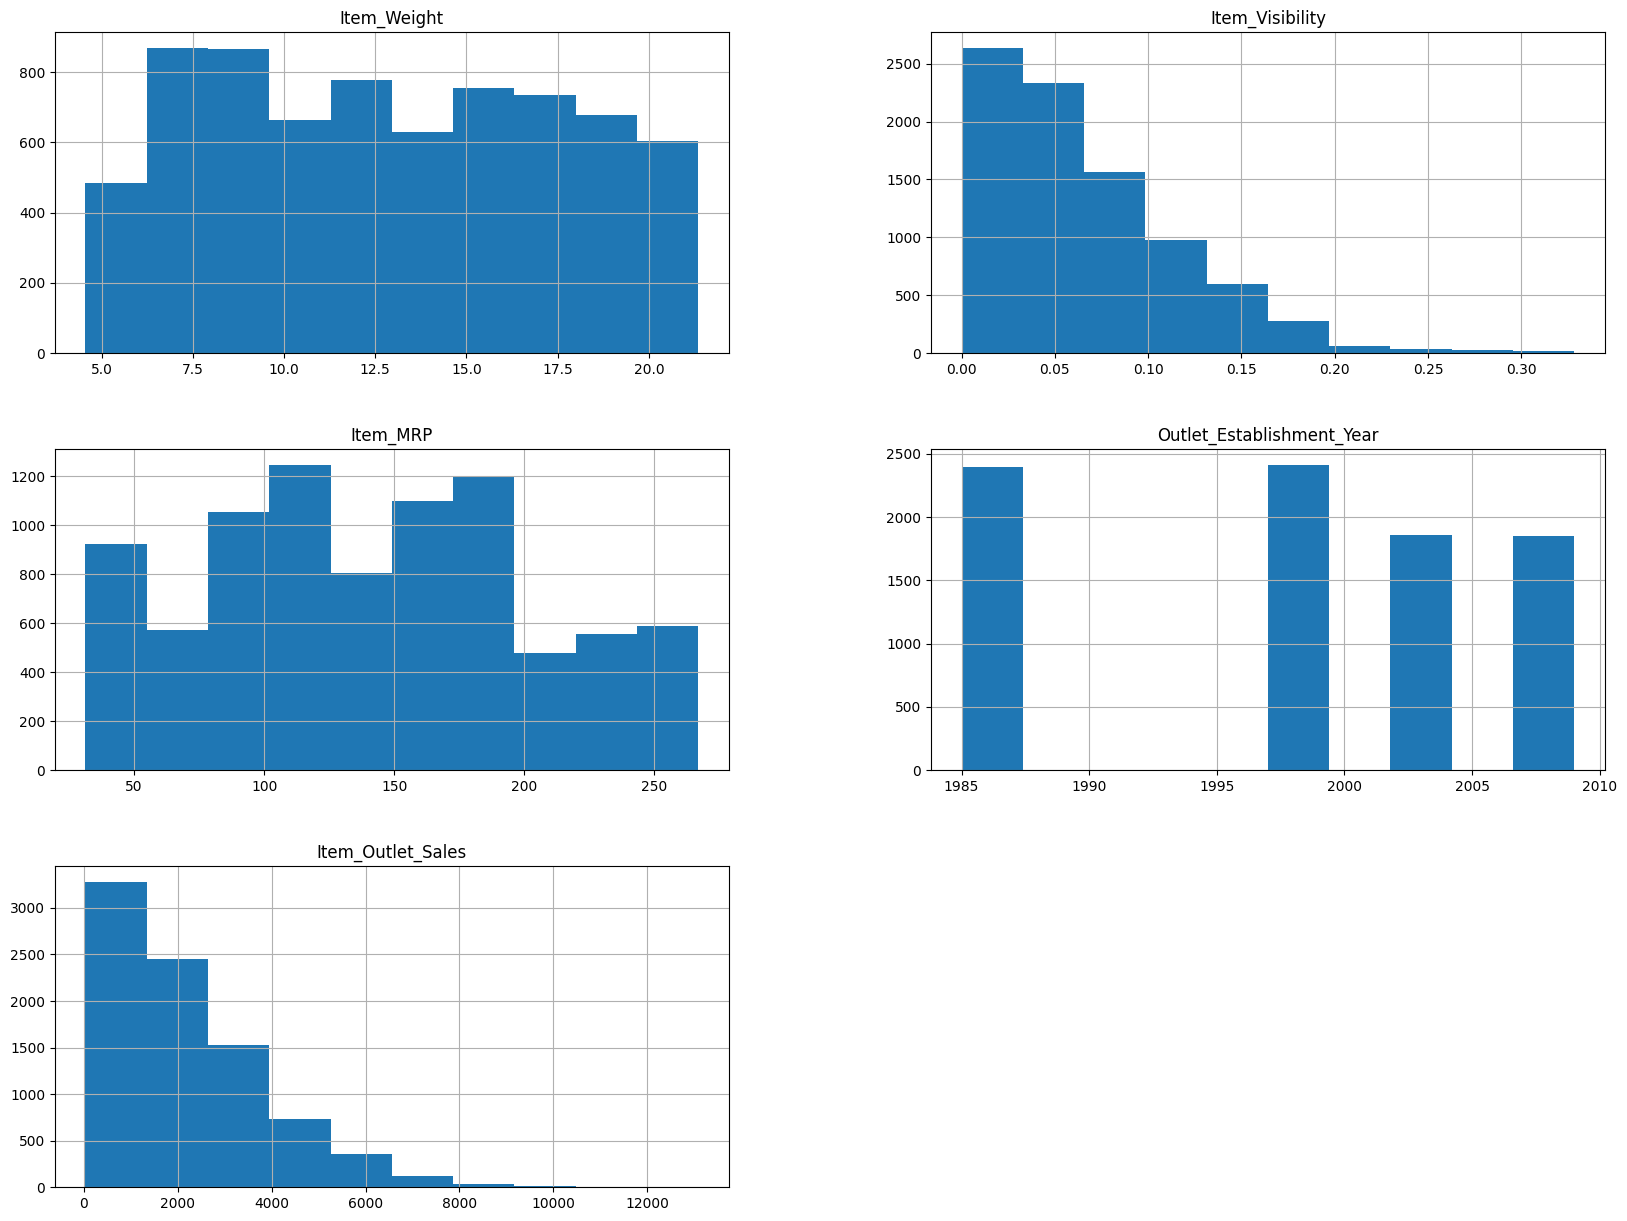

In [571]:
# Plotting the distribution of each feature of the dataset in its individual histogram
data.hist(figsize=(20, 15))
plt.show()

In [572]:
# CHECKING FOR MISSING VALUES
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


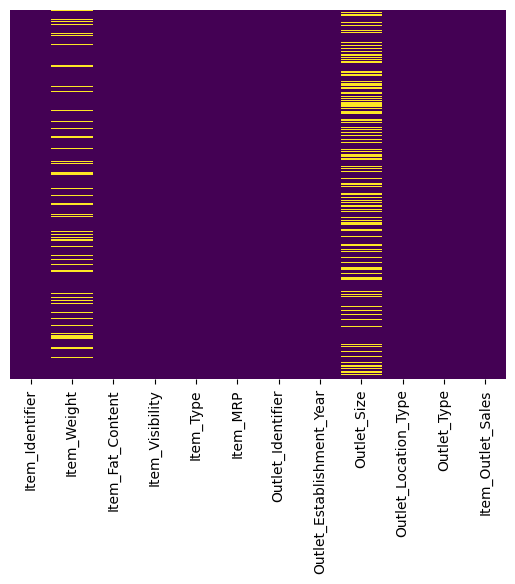

In [573]:
# Plotting the missing values on a heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()


In [574]:
# Trying different ways to fill the missing values without changing the original dataset
data["Item_Weight_mean"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())
data["Item_Weight_median"] = data["Item_Weight"].fillna(data["Item_Weight"].median())

In [575]:
# We will compare now the variance of the original dataset and the dataset with the missing values filled
print(data["Item_Weight"].var())
print(data["Item_Weight_mean"].var())
print(data["Item_Weight_median"].var())

21.561688259836558
17.86012173506058
17.869561454073647


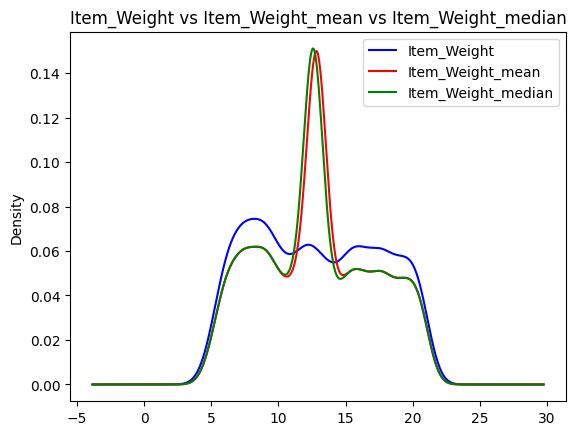

In [576]:
# We will plot the dataset with the missing values filled to check the difference
data["Item_Weight"].plot(kind='kde', color='blue')
data["Item_Weight_mean"].plot(kind='kde', color='red')
data["Item_Weight_median"].plot(kind='kde', color='green')
plt.title('Item_Weight vs Item_Weight_mean vs Item_Weight_median')
plt.legend()
plt.show()

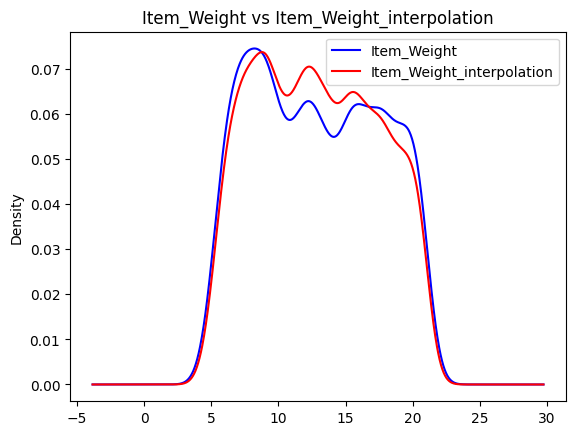

In [577]:
# There difference is quite noticeable, so we try interpolation to fill the missing values
# Interpolation is a process of determining the unknown values that lie in between the known data points. -- Google
data["Item_Weight_interpolation"] = data["Item_Weight"].interpolate(method = "linear")

# We will compare the plots of the original dataset and the dataset with the missing values filled using interpolation
data["Item_Weight"].plot(kind='kde', color='blue')
data["Item_Weight_interpolation"].plot(kind='kde', color='red')
plt.title('Item_Weight vs Item_Weight_interpolation')
plt.legend()
plt.show()


In [578]:
# We can see that interpolationn gives better results than mean and median, so we will use interpolation to fill the missing values
data["Item_Weight"] = data["Item_Weight"].interpolate(method = "linear")
data.drop(["Item_Weight_mean", "Item_Weight_median", "Item_Weight_interpolation"], axis=1, inplace=True)

In [579]:
# We check for missing values again
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [580]:
# We treat the other missing values in the dataset
# But as we know that outlet size is not a numerical value, so we need to figure out a way to fill the missing values

# We will use mode to replace the missing values
mode_of_outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [581]:
# We fill the missing values in the Outlet_Size column
missing_values = data["Outlet_Size"].isnull()
data.loc[missing_values, "Outlet_Size"] = data.loc[missing_values, "Outlet_Type"].apply(lambda x: mode_of_outlet_size[x])

In [582]:
# Checking again for missing values in the dataset
print(data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [583]:
# No missing values are present in the dataset now so we can move forward

In [584]:
# Dropping unnecessary columns
data = data.drop('Item_Identifier', axis=1)
data = data.drop('Outlet_Identifier', axis=1)

In [585]:
# Checking the first 5 rows of the dataset
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [586]:
# We have categorical data in the dataset, so we need to convert it into numerical data
# We will use Label Encoding for this purpose

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Item_Fat_Content"] = le.fit_transform(data["Item_Fat_Content"])
data["Item_Type"] = le.fit_transform(data["Item_Type"])
data["Outlet_Size"] = le.fit_transform(data["Outlet_Size"])
data["Outlet_Location_Type"] = le.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"] = le.fit_transform(data["Outlet_Type"])

# Checking the first 5 rows of the dataset
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


In [587]:
# Creating a copy of data for backup
data_copy = data.copy()
# Split data into 2 training sets and 1 test set we take 80% of the data for training and 20% for testing
train = data.sample(frac=0.8)
test = data.drop(train.index)
train1 = train.sample(frac=0.5)
train2 = train.drop(train1.index)
print(data.shape, train1.shape, train2.shape, test.shape)

(8523, 10) (3409, 10) (3409, 10) (1705, 10)


In [588]:
# Checking the first 5 rows of the training set 1
train1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
311,15.0,2,0.054378,3,59.1904,1997,2,0,1,527.3136
6559,19.7,1,0.000000,7,125.9362,1999,1,0,1,1635.8706
7515,13.0,2,0.070243,13,65.7484,1987,0,2,1,391.4904
2032,12.6,2,0.031509,0,170.5764,1987,0,2,1,3779.0808
3430,16.1,1,0.100800,6,78.4328,2007,2,1,1,1467.4232


In [589]:
# Checking the first 5 rows of the training set 2
train2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3543,9.0825,1,0.000000,13,151.6708,1985,1,2,3,4815.0656
4263,16.7250,2,0.058546,10,155.8314,1985,2,0,0,310.2628
1479,20.7500,1,0.109153,13,161.3578,2009,1,2,2,4492.8184
568,20.2500,2,0.014816,4,194.1162,1999,1,0,1,3848.3240
4231,7.2350,1,0.000000,13,197.2452,2004,2,1,1,2348.9424


In [590]:
# Checking the stats of the training set 1
train1.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000
mean,12.885391,1.373423,0.065739,7.137284,140.338632,1997.832502,1.453212,1.100323,1.200352,2181.045179
std,4.477090,0.642223,0.050861,4.247747,62.830919,8.366414,0.681493,0.816441,0.792823,1715.029497
min,4.555000,0.000000,0.000000,0.000000,31.890000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.000000,1.000000,0.027139,4.000000,91.680400,1987.000000,1.000000,0.000000,1.000000,824.926200
50%,12.600000,1.000000,0.054366,6.000000,142.047000,1999.000000,2.000000,1.000000,1.000000,1797.660000
75%,16.700000,2.000000,0.093861,10.000000,186.292400,2004.000000,2.000000,2.000000,1.000000,3113.280800
max,21.250000,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,10993.689600


In [591]:
# Checking the stats of the training set 2
train2.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000
mean,12.794979,1.366676,0.065518,7.301261,141.848784,1997.756233,1.448225,1.116750,1.214432,2203.951511
std,4.429826,0.633951,0.051682,4.172963,61.542209,8.360082,0.682853,0.813532,0.802770,1695.122318
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.955800
25%,8.977500,1.000000,0.026375,4.000000,95.375200,1987.000000,1.000000,0.000000,1.000000,864.208400
50%,12.600000,1.000000,0.052474,6.000000,144.444400,1999.000000,2.000000,1.000000,1.000000,1808.312800
75%,16.350000,2.000000,0.093656,10.000000,185.360800,2004.000000,2.000000,2.000000,1.000000,3115.944000
max,21.350000,4.000000,0.321115,15.000000,266.588400,2009.000000,2.000000,2.000000,3.000000,11445.102000


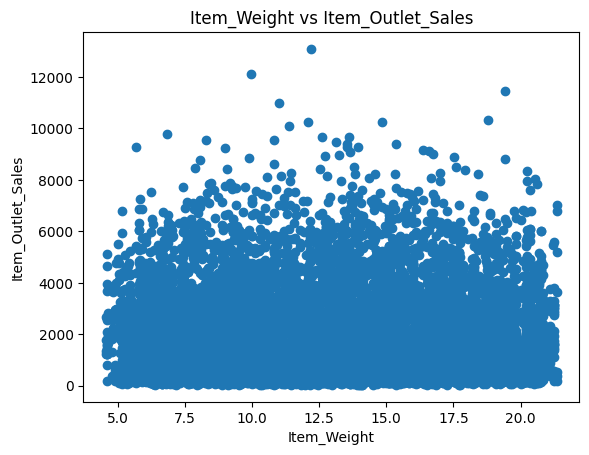

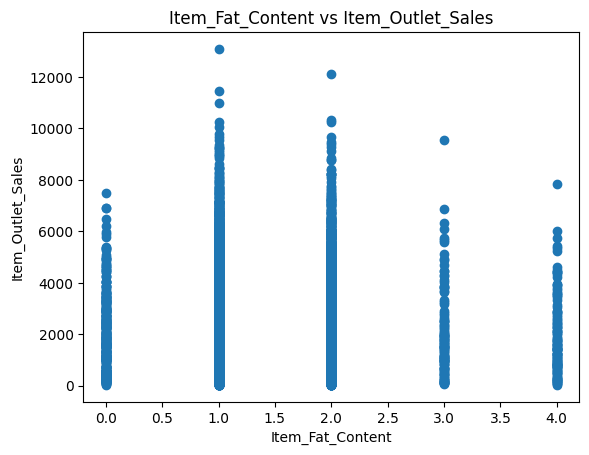

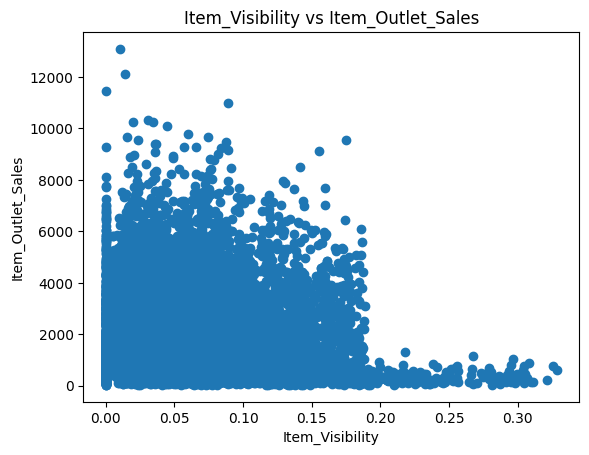

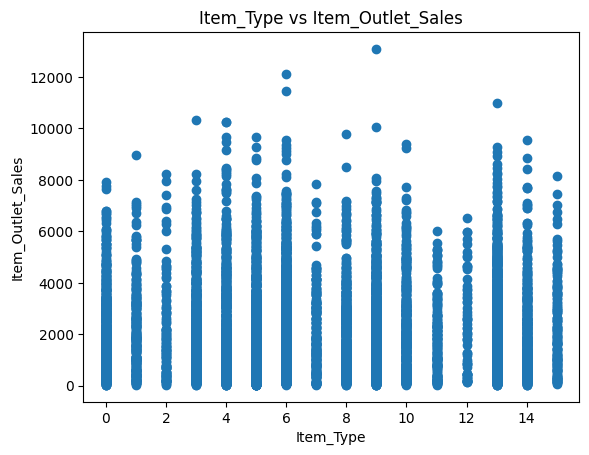

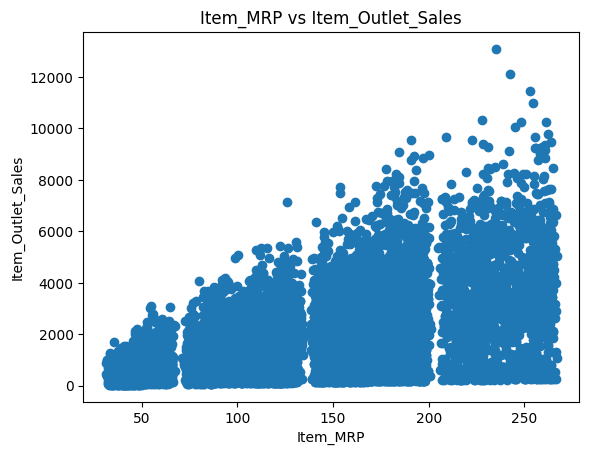

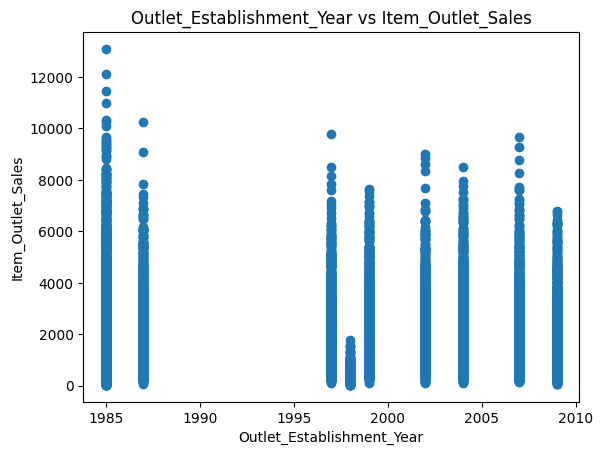

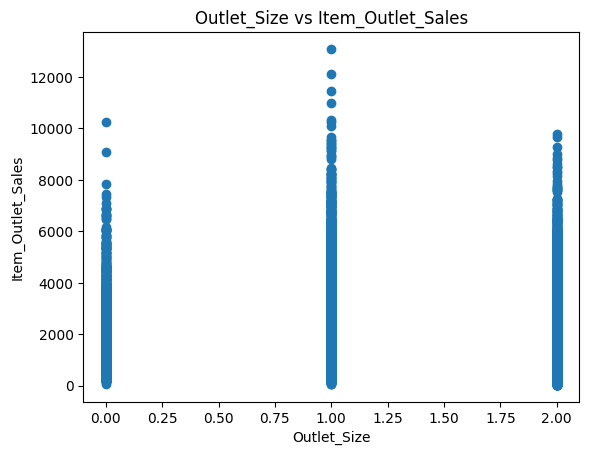

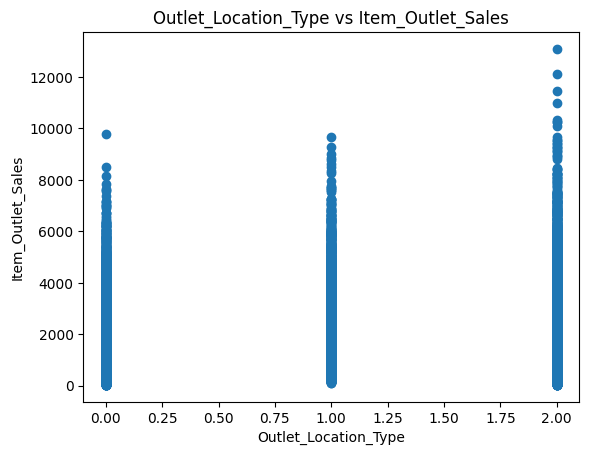

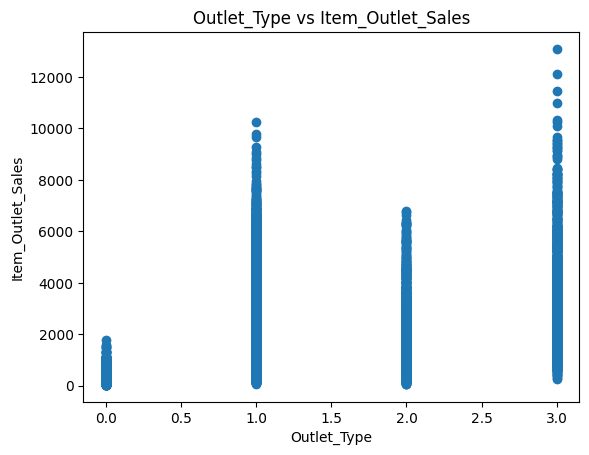

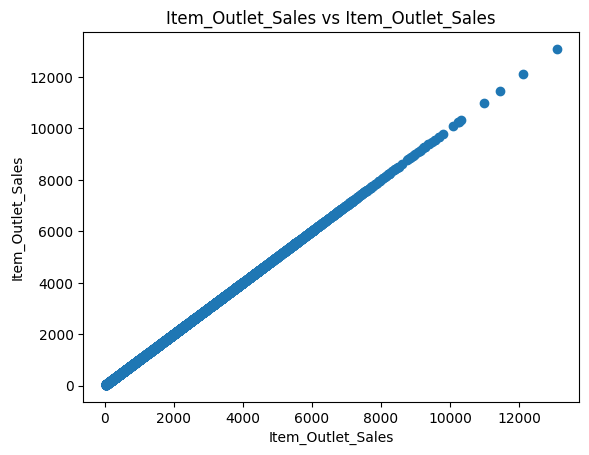

In [592]:
# We will plot each column of dataset against the Item_Outlet_Sales to check the relationship between them
for i, column in enumerate(data.columns):
    plt.scatter(data[column], data["Item_Outlet_Sales"])
    plt.xlabel(column)
    plt.ylabel("Item_Outlet_Sales")
    plt.title(column + " vs " + "Item_Outlet_Sales")
    plt.show()


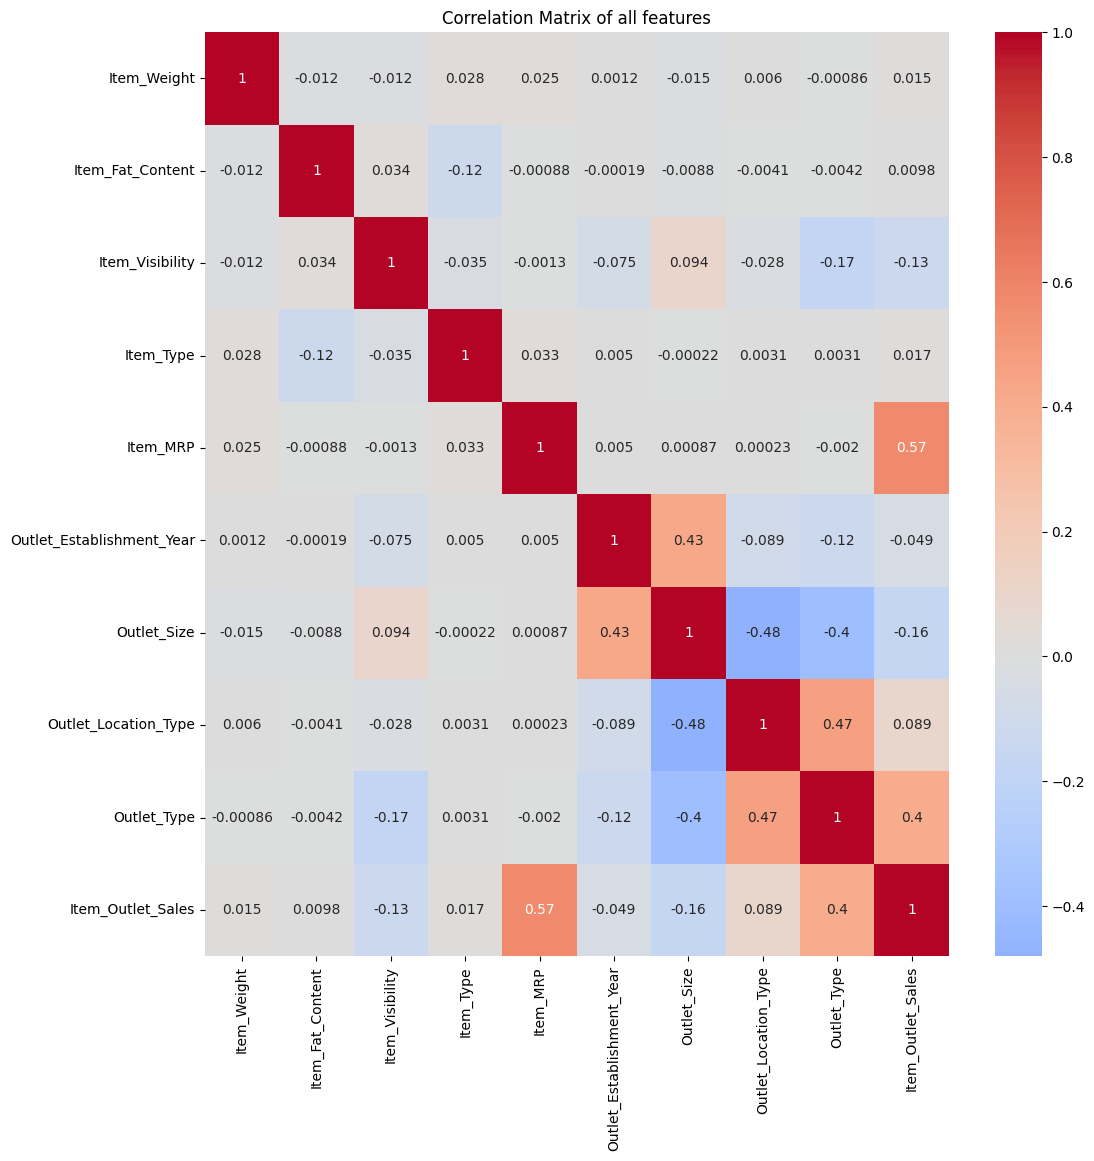

In [593]:
# We make a heatmap for all features to check the correlation between them
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center = 0)
plt.title("Correlation Matrix of all features")
plt.show()

[0.07727665 0.0336916  0.0843642  0.06556677 0.42838359 0.04069593
 0.0164917  0.01126668 0.24226288]


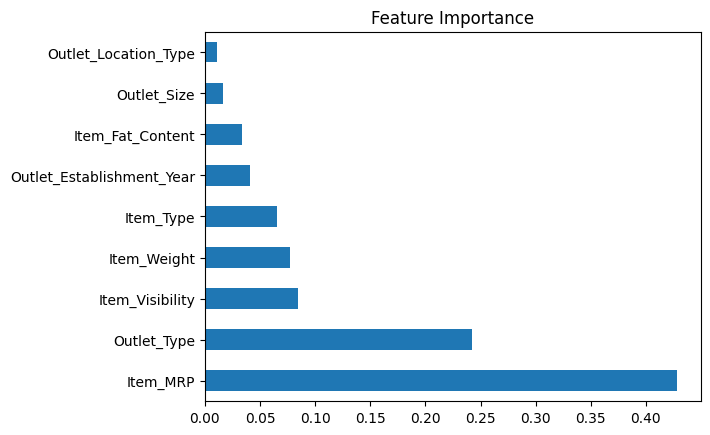

In [594]:
# Plot the feature importance
from sklearn.ensemble import ExtraTreesRegressor
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']
model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [595]:
train1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
311,15.0,2,0.054378,3,59.1904,1997,2,0,1,527.3136
6559,19.7,1,0.000000,7,125.9362,1999,1,0,1,1635.8706
7515,13.0,2,0.070243,13,65.7484,1987,0,2,1,391.4904
2032,12.6,2,0.031509,0,170.5764,1987,0,2,1,3779.0808
3430,16.1,1,0.100800,6,78.4328,2007,2,1,1,1467.4232


In [596]:
train2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3543,9.0825,1,0.000000,13,151.6708,1985,1,2,3,4815.0656
4263,16.7250,2,0.058546,10,155.8314,1985,2,0,0,310.2628
1479,20.7500,1,0.109153,13,161.3578,2009,1,2,2,4492.8184
568,20.2500,2,0.014816,4,194.1162,1999,1,0,1,3848.3240
4231,7.2350,1,0.000000,13,197.2452,2004,2,1,1,2348.9424


In [597]:
# Trying to predict the sales using Decision Trees

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# We will make two decision tree models for training set 1 and training set 2
# For training set 1
X_train1 = train1.drop('Item_Outlet_Sales', axis=1)
y_train1 = train1['Item_Outlet_Sales']
model1 = DecisionTreeRegressor()
model1.fit(X_train1, y_train1)

# For training set 2
X_train2 = train2.drop('Item_Outlet_Sales', axis=1)
y_train2 = train2['Item_Outlet_Sales']
model2 = DecisionTreeRegressor()
model2.fit(X_train2, y_train2)

# Now we will predict the values for the test set using both the trees and use the average of the two trees as the final prediction
X_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# Calculating the average of the two predictions
final_pred_DT = (pred1 + pred2) / 2

print("R2 score", metrics.r2_score(y_test, final_pred_DT))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_DT)))


R2 score 0.3804982262587986
RMSE: 1347.2331283534909


In [598]:
# Trying to predict the sales using Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# We will make two random forest models for training set 1 and training set 2
# For training set 1
X_train1 = train1.drop('Item_Outlet_Sales', axis=1)
y_train1 = train1['Item_Outlet_Sales']
model1 = RandomForestRegressor()
model1.fit(X_train1, y_train1)

# For training set 2
X_train2 = train2.drop('Item_Outlet_Sales', axis=1)
y_train2 = train2['Item_Outlet_Sales']
model2 = RandomForestRegressor()
model2.fit(X_train2, y_train2)

# Now we will predict the values for the test set using both the trees and use the average of the two trees as the final prediction
X_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# Calculating the average of the two predictions
final_pred_RF = (pred1 + pred2) / 2

print("R2 score", metrics.r2_score(y_test, final_pred_RF))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_RF)))

R2 score 0.5788012731209105
RMSE: 1110.874509385212


In [599]:
# Trying to predict the sales using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# We will make two linear regression models for training set 1 and training set 2
# For training set 1
X_train1 = train1.drop('Item_Outlet_Sales', axis=1)
y_train1 = train1['Item_Outlet_Sales']
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

# For training set 2
X_train2 = train2.drop('Item_Outlet_Sales', axis=1)
y_train2 = train2['Item_Outlet_Sales']
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

# Now we will predict the values for the test set using both the trees and use the average of the two trees as the final prediction
X_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# Calculating the average of the two predictions
final_pred_LR = (pred1 + pred2) / 2

print("R2 score", metrics.r2_score(y_test, final_pred_LR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_LR)))

R2 score 0.4996685139218794
RMSE: 1210.738613866668


In [600]:
# Trying to predict the sales using ADA Boost

from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

# We will make two ADA Boost models for training set 1 and training set 2
# For training set 1
X_train1 = train1.drop('Item_Outlet_Sales', axis=1)
y_train1 = train1['Item_Outlet_Sales']
model1 = AdaBoostRegressor()
model1.fit(X_train1, y_train1)

# For training set 2
X_train2 = train2.drop('Item_Outlet_Sales', axis=1)
y_train2 = train2['Item_Outlet_Sales']
model2 = AdaBoostRegressor()
model2.fit(X_train2, y_train2)

# Now we will predict the values for the test set using both the trees and use the average of the two trees as the final prediction
X_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# Calculating the average of the two predictions
final_pred_ADAB = (pred1 + pred2) / 2

print("R2 score", metrics.r2_score(y_test, final_pred_ADAB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_ADAB)))

R2 score 0.5625413331792435
RMSE: 1132.1135516010825


In [601]:
# Trying to predict the sales using Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

# We will make two Gradient Boosting models for training set 1 and training set 2
# For training set 1
X_train1 = train1.drop('Item_Outlet_Sales', axis=1)
y_train1 = train1['Item_Outlet_Sales']
model1 = GradientBoostingRegressor()
model1.fit(X_train1, y_train1)

# For training set 2
X_train2 = train2.drop('Item_Outlet_Sales', axis=1)
y_train2 = train2['Item_Outlet_Sales']
model2 = GradientBoostingRegressor()
model2.fit(X_train2, y_train2)

# Now we will predict the values for the test set using both the trees and use the average of the two trees as the final prediction
X_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# Calculating the average of the two predictions
final_pred_GB = (pred1 + pred2) / 2

print("R2 score", metrics.r2_score(y_test, final_pred_GB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_GB)))

R2 score 0.5966218789590322
RMSE: 1087.1204009344222


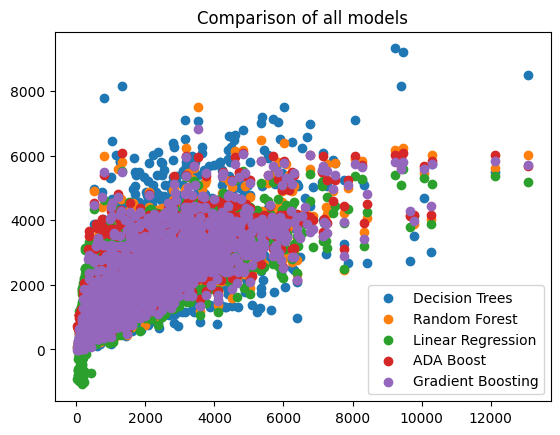

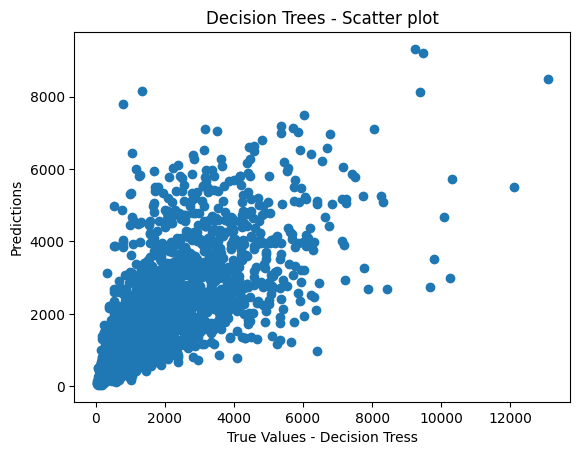

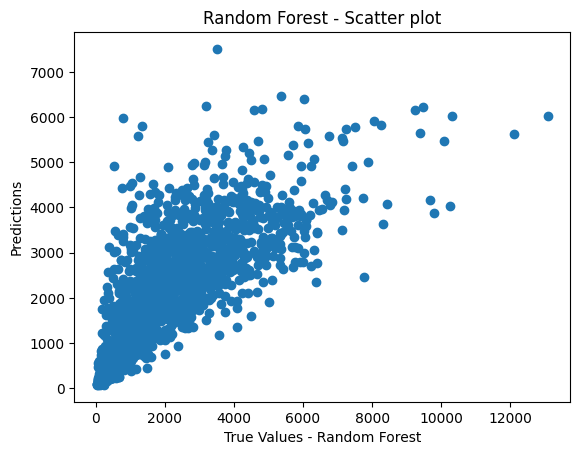

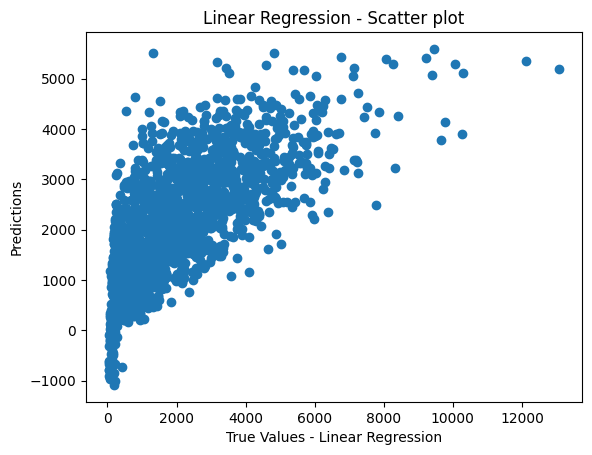

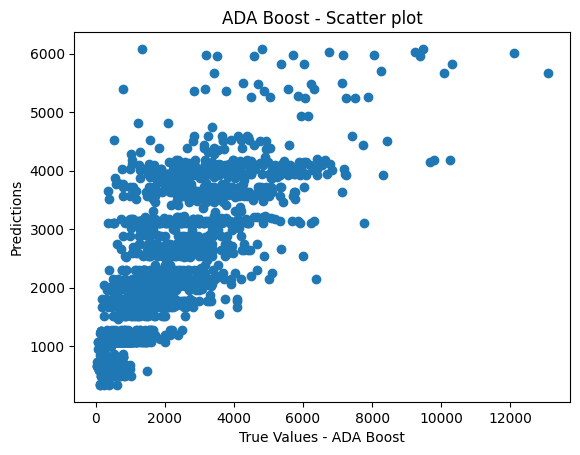

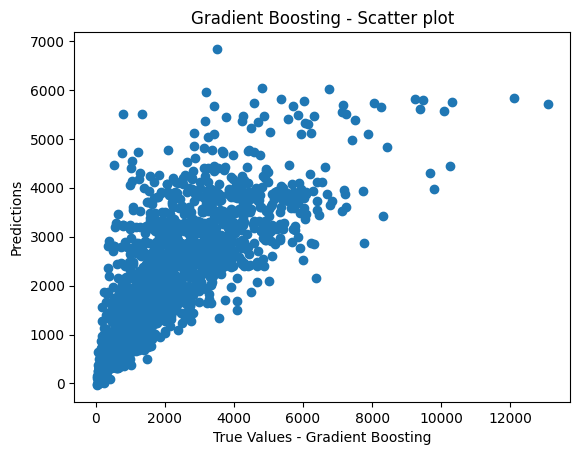

In [602]:
# We plot the results of all models to compare them on a single graph
plt.scatter(y_test, final_pred_DT, label='Decision Trees')
plt.scatter(y_test, final_pred_RF, label='Random Forest')
plt.scatter(y_test, final_pred_LR, label='Linear Regression')
plt.scatter(y_test, final_pred_ADAB, label='ADA Boost')
plt.scatter(y_test, final_pred_GB, label='Gradient Boosting')
plt.title('Comparison of all models')
plt.legend()
plt.show()


# We will compare the results of all models by plotting them on a graph
y_test = test['Item_Outlet_Sales']

# For Decision Trees
plt.scatter(y_test, final_pred_DT)
# plt.scatter(y_test, y_test)
plt.title('Decision Trees - Scatter plot')
plt.xlabel('True Values - Decision Tress')
plt.ylabel('Predictions')
plt.show()

# For Random Forest
plt.scatter(y_test, final_pred_RF)
# plt.scatter(y_test, y_test)
plt.title('Random Forest - Scatter plot')
plt.xlabel('True Values - Random Forest')
plt.ylabel('Predictions')
plt.show()

# For Linear Regression
plt.scatter(y_test, final_pred_LR)
# plt.scatter(y_test, y_test)
plt.title('Linear Regression - Scatter plot')
plt.xlabel('True Values - Linear Regression')
plt.ylabel('Predictions')
plt.show()

# For ADA Boost
plt.scatter(y_test, final_pred_ADAB)
# plt.scatter(y_test, y_test)
plt.title('ADA Boost - Scatter plot')
plt.xlabel('True Values - ADA Boost')
plt.ylabel('Predictions')
plt.show()

# For Gradient Boosting
plt.scatter(y_test, final_pred_GB)
# plt.scatter(y_test, y_test)
plt.title('Gradient Boosting - Scatter plot')
plt.xlabel('True Values - Gradient Boosting')
plt.ylabel('Predictions')
plt.show()


R2 score for Decision Trees: 0.3804982262587986
R2 score for Random Forest: 0.5788012731209105
R2 score for Linear Regression: 0.4996685139218794
R2 score for ADA Boost: 0.5625413331792435
R2 score for Gradient Boosting: 0.5966218789590322



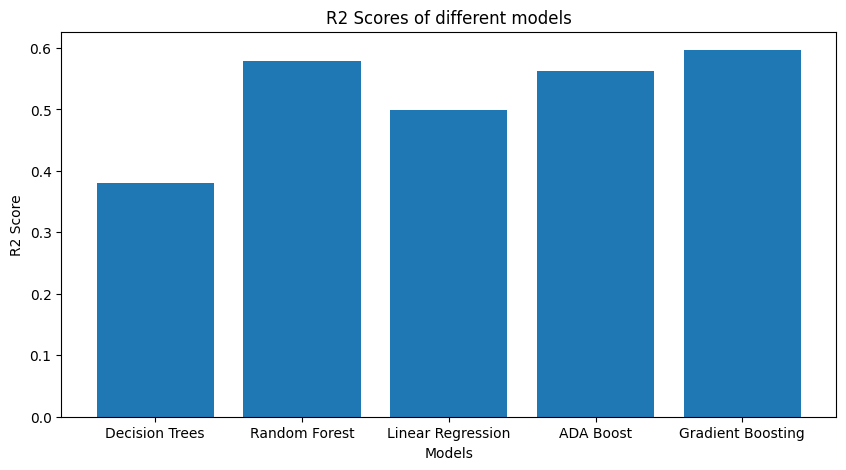

In [603]:
# We compare the accuracy of all the models by plotting the R2 score on a graph
R2_scores = [metrics.r2_score(y_test, final_pred_DT), metrics.r2_score(y_test, final_pred_RF), metrics.r2_score(y_test, final_pred_LR), metrics.r2_score(y_test, final_pred_ADAB), metrics.r2_score(y_test, final_pred_GB)]
print("""
R2 score for Decision Trees: {}
R2 score for Random Forest: {}
R2 score for Linear Regression: {}
R2 score for ADA Boost: {}
R2 score for Gradient Boosting: {}
""".format(R2_scores[0], R2_scores[1], R2_scores[2], R2_scores[3], R2_scores[4]))
models = ['Decision Trees', 'Random Forest', 'Linear Regression','ADA Boost', 'Gradient Boosting']
plt.figure(figsize=(10, 5))
plt.title('R2 Scores of different models')
plt.bar(models, R2_scores)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()

Mean Absolute Error, Mean Squared Error, Root Mean Squared Error respectively for:
Decision Trees:  [921.1678828739002, 1815037.102133134, 1347.2331283534909]
Random Forest:  [745.8927175413489, 1234042.1756018354, 1110.874509385212]
Linear Regression:  [877.4718120198688, 1465887.9911077807, 1210.738613866668]
ADA Boost:  [823.7103052713351, 1281681.0937188168, 1132.1135516010825]
Gradient Boosting:  [730.5624010535162, 1181830.766127819, 1087.1204009344222]


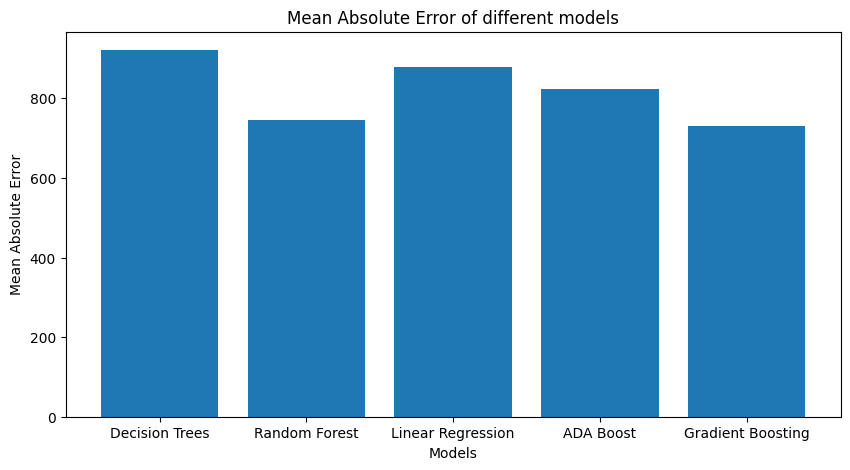

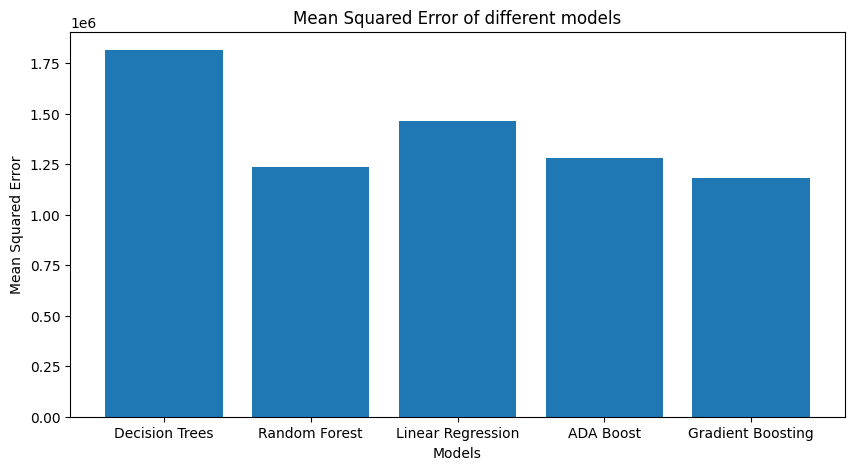

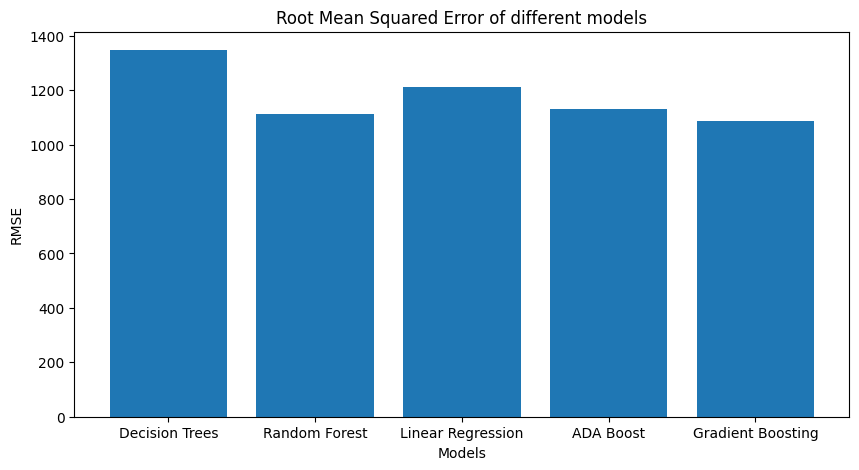

In [604]:
# check on other evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
decisionTrees = [mean_absolute_error(y_test, final_pred_DT),mean_squared_error(y_test, final_pred_DT),np.sqrt(metrics.mean_squared_error(y_test, final_pred_DT))]
randomForest = [mean_absolute_error(y_test, final_pred_RF),mean_squared_error(y_test, final_pred_RF),np.sqrt(metrics.mean_squared_error(y_test, final_pred_RF))]
linearRegression = [mean_absolute_error(y_test, final_pred_LR),mean_squared_error(y_test, final_pred_LR),np.sqrt(metrics.mean_squared_error(y_test, final_pred_LR))]
ADABoost = [mean_absolute_error(y_test, final_pred_ADAB),mean_squared_error(y_test, final_pred_ADAB),np.sqrt(metrics.mean_squared_error(y_test, final_pred_ADAB))]
GradientBoosting = [mean_absolute_error(y_test, final_pred_GB),mean_squared_error(y_test, final_pred_GB),np.sqrt(metrics.mean_squared_error(y_test, final_pred_GB))]
print("Mean Absolute Error, Mean Squared Error, Root Mean Squared Error respectively for:")
print("Decision Trees: ", decisionTrees)
print("Random Forest: ", randomForest)
print("Linear Regression: ", linearRegression)
print("ADA Boost: ", ADABoost)
print("Gradient Boosting: ", GradientBoosting)

MAE = [decisionTrees[0], randomForest[0], linearRegression[0], ADABoost[0], GradientBoosting[0]]
MSE = [decisionTrees[1], randomForest[1], linearRegression[1], ADABoost[1], GradientBoosting[1]]
RMSE = [decisionTrees[2], randomForest[2], linearRegression[2], ADABoost[2], GradientBoosting[2]]
labels = ['Decision Trees', 'Random Forest', 'Linear Regression', 'ADA Boost', 'Gradient Boosting']
plt.figure(figsize=(10, 5))
plt.bar(labels, MAE)
plt.title('Mean Absolute Error of different models')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.figure(figsize=(10, 5))
plt.bar(labels, MSE)
plt.title('Mean Squared Error of different models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()
plt.figure(figsize=(10, 5))
plt.bar(labels, RMSE)
plt.title('Root Mean Squared Error of different models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()


In [605]:
# We perform feature scaling on the dataset
feature_scale = [feature for feature in data_copy.columns if feature not in ['Item_Identifier', 'Outlet_Identifier']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_copy[feature_scale])

StandardScaler()

In [606]:
# For feature selection
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option('display.max_columns', None)

In [607]:
x_train = data_copy.drop(['Item_Outlet_Sales'], axis=1)
y_train = data_copy['Item_Outlet_Sales']

In [608]:
feature_sel_model = SelectFromModel(Ridge(alpha=1.0, random_state=0))
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Ridge(random_state=0))

In [609]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]

print('Total features: {}'.format((x_train.shape[1])))
print('Selected features: {}'.format(len(selected_feat)))
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))


Total features: 9
Selected features: 2
Features with coefficients shrank to zero: 0


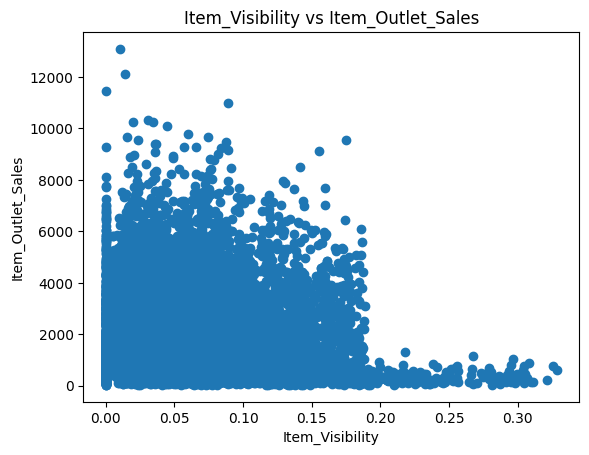

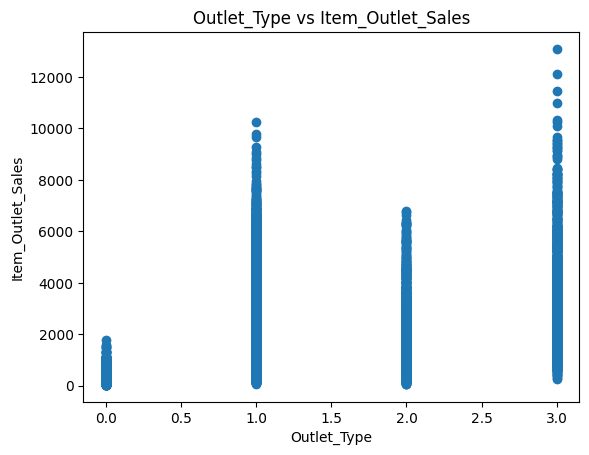

In [610]:
x_train = x_train[selected_feat]    # We will use only the selected features for training
# plot a scatter plot against all the selected features
for i, column in enumerate(x_train.columns):
    plt.scatter(x_train[column], y_train)
    plt.xlabel(column)
    plt.ylabel("Item_Outlet_Sales")
    plt.title(column + " vs " + "Item_Outlet_Sales")
    plt.show()


In [611]:
# Trying to predict values using a decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# We will make decision tree for x_train and y_train    
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Now we will predict the values for the test set using the tree
X_test = test.drop('Item_Outlet_Sales', axis=1)
X_test = X_test[selected_feat]
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
final_pred_DecisionTrees = model.predict(X_test)

print("R2 score", metrics.r2_score(y_test, final_pred_DecisionTrees))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_DecisionTrees)))

R2 score 0.9431480067319583
RMSE: 408.1260579787366


In [612]:
# Trying to predict values using Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# We will make random forest for x_train and y_train
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Now we will predict the values for the test set using the tree
X_test = test.drop('Item_Outlet_Sales', axis=1)
X_test = X_test[selected_feat]
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
final_pred_RandomForest = model.predict(X_test)

print("R2 score", metrics.r2_score(y_test, final_pred_RandomForest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_RandomForest)))

R2 score 0.8196144441660846
RMSE: 726.9798206096211


In [613]:
# Trying to predict values using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# We will make linear regression for x_train and y_train
model = LinearRegression()
model.fit(x_train, y_train)

# Now we will predict the values for the test set using the tree
X_test = test.drop('Item_Outlet_Sales', axis=1)
X_test = X_test[selected_feat]
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
final_pred_LinearRegression = model.predict(X_test)

print("R2 score", metrics.r2_score(y_test, final_pred_LinearRegression))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_LinearRegression)))

R2 score 0.1566804477356507
RMSE: 1571.8733875140583


In [614]:
# Trying to predict values using ADA Boost
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

# We will make ADA Boost for x_train and y_train
model = AdaBoostRegressor()
model.fit(x_train, y_train)

# Now we will predict the values for the test set using the tree
X_test = test.drop('Item_Outlet_Sales', axis=1)
X_test = X_test[selected_feat]
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
final_pred_ADABoost = model.predict(X_test)

print("R2 score", metrics.r2_score(y_test, final_pred_ADABoost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_ADABoost)))

R2 score 0.12912216203972382
RMSE: 1597.3500359432214


In [615]:
# Trying to predict value using Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

# We will make Gradient Boosting for x_train and y_train
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# Now we will predict the values for the test set using the tree
X_test = test.drop('Item_Outlet_Sales', axis=1)
X_test = X_test[selected_feat]
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
final_pred_GradientBoosting = model.predict(X_test)

print("R2 score", metrics.r2_score(y_test, final_pred_GradientBoosting))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_GradientBoosting)))

R2 score 0.2810787906254981
RMSE: 1451.3164725746474


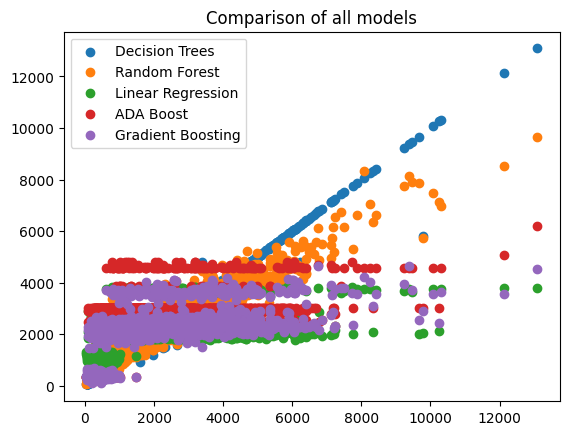

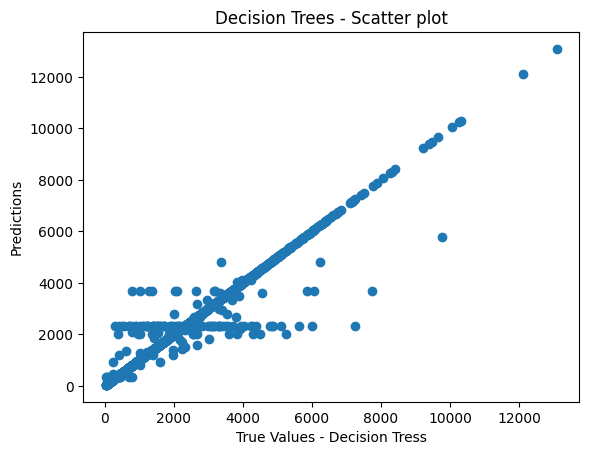

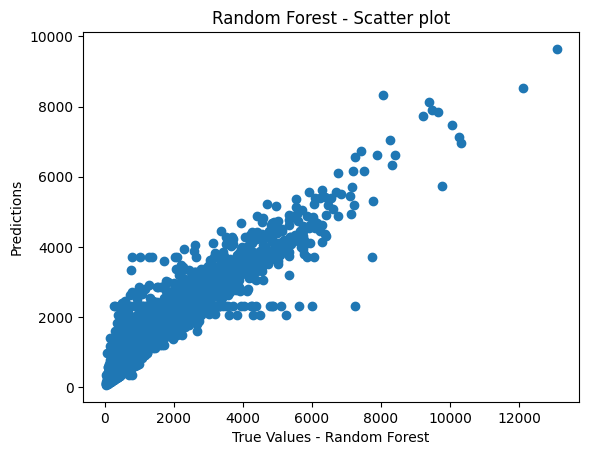

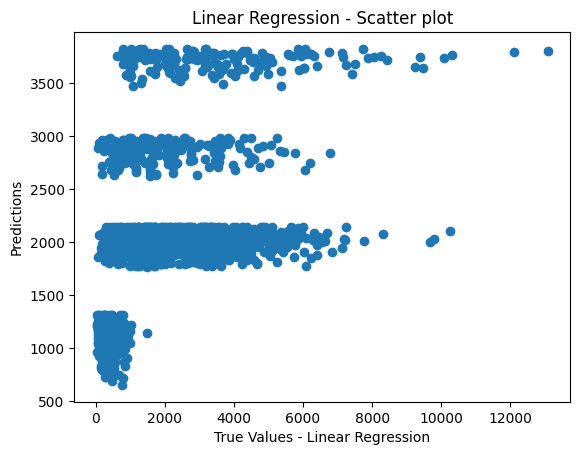

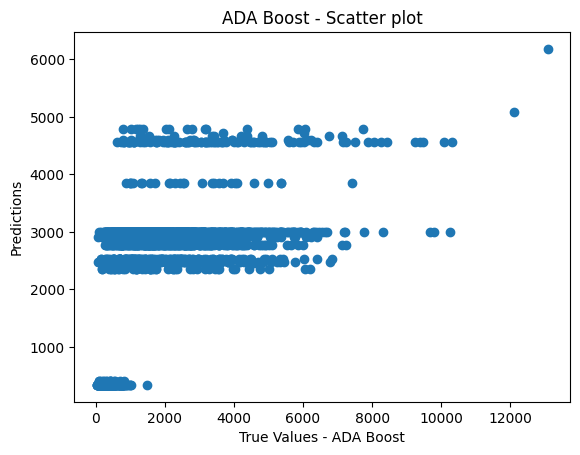

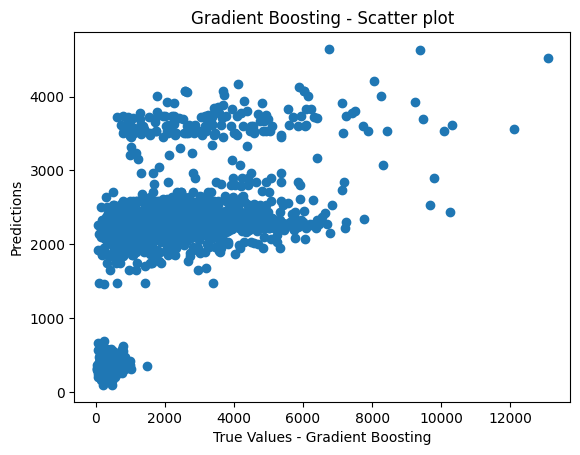

In [616]:
# Plotting the results of all models to compare them on a single graph
plt.scatter(y_test, final_pred_DecisionTrees, label='Decision Trees')
plt.scatter(y_test, final_pred_RandomForest, label='Random Forest')
plt.scatter(y_test, final_pred_LinearRegression, label='Linear Regression')
plt.scatter(y_test, final_pred_ADABoost, label='ADA Boost')
plt.scatter(y_test, final_pred_GradientBoosting, label='Gradient Boosting')
plt.title('Comparison of all models')
plt.legend()
plt.show()

# We will compare the results of all models by plotting them on a graph
y_test = test['Item_Outlet_Sales']

# For Decision Trees
plt.scatter(y_test, final_pred_DecisionTrees)
# plt.scatter(y_test, y_test)
plt.title('Decision Trees - Scatter plot')
plt.xlabel('True Values - Decision Tress')
plt.ylabel('Predictions')
plt.show()

# For Random Forest
plt.scatter(y_test, final_pred_RandomForest)
# plt.scatter(y_test, y_test)
plt.title('Random Forest - Scatter plot')
plt.xlabel('True Values - Random Forest')
plt.ylabel('Predictions')
plt.show()

# For Linear Regression
plt.scatter(y_test, final_pred_LinearRegression)
# plt.scatter(y_test, y_test)
plt.title('Linear Regression - Scatter plot')
plt.xlabel('True Values - Linear Regression')
plt.ylabel('Predictions')
plt.show()

# For ADA Boost
plt.scatter(y_test, final_pred_ADABoost)
# plt.scatter(y_test, y_test)
plt.title('ADA Boost - Scatter plot')
plt.xlabel('True Values - ADA Boost')
plt.ylabel('Predictions')
plt.show()

# For Gradient Boosting
plt.scatter(y_test, final_pred_GradientBoosting)
# plt.scatter(y_test, y_test)
plt.title('Gradient Boosting - Scatter plot')
plt.xlabel('True Values - Gradient Boosting')
plt.ylabel('Predictions')
plt.show()


R2 Score for Decision Trees: 0.9431480067319583
R2 Score for Random Forest: 0.8196144441660846
R2 Score for Linear Regression: 0.1566804477356507
R2 Score for ADA Boost: 0.12912216203972382
R2 Score for Gradient Boosting: 0.2810787906254981



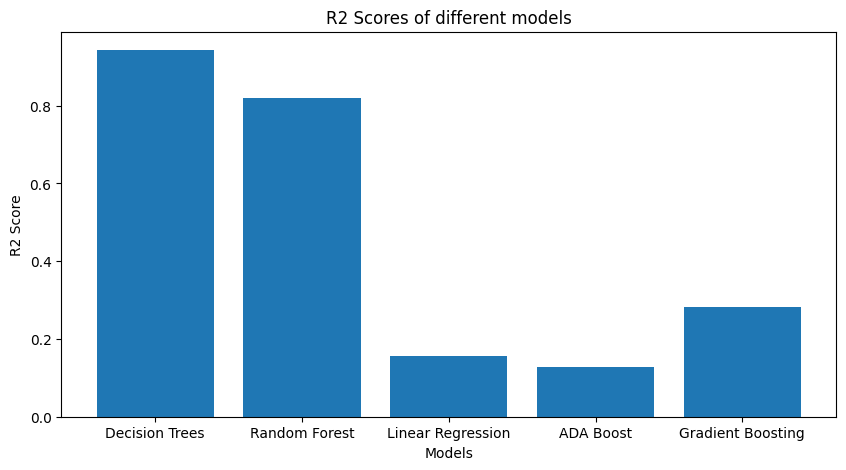

In [617]:
# PLotting the R2 scores of all models to compare them
R2_scores = [metrics.r2_score(y_test, final_pred_DecisionTrees), metrics.r2_score(y_test, final_pred_RandomForest), metrics.r2_score(y_test, final_pred_LinearRegression), metrics.r2_score(y_test, final_pred_ADABoost), metrics.r2_score(y_test, final_pred_GradientBoosting)]
models = ['Decision Trees', 'Random Forest', 'Linear Regression','ADA Boost', 'Gradient Boosting']
print("""
R2 Score for Decision Trees: {}
R2 Score for Random Forest: {}
R2 Score for Linear Regression: {}
R2 Score for ADA Boost: {}
R2 Score for Gradient Boosting: {}
""".format(R2_scores[0], R2_scores[1], R2_scores[2], R2_scores[3], R2_scores[4]))
plt.figure(figsize=(10, 5))
plt.title('R2 Scores of different models')
plt.bar(models, R2_scores)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()



RMSE of Decision Trees: 408.1260579787366
RMSE of Random Forest: 726.9798206096211
RMSE of Linear Regression: 1571.8733875140583
RMSE of ADA Boost: 1597.3500359432214
RMSE of Gradient Boosting: 1451.3164725746474



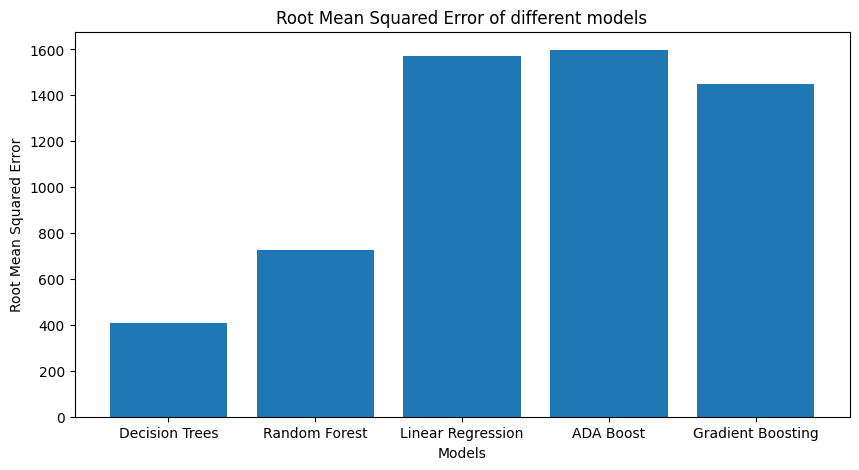


MSE of Decision Trees: 166566.87920126307
MSE of Random Forest: 528499.6595735969
MSE of Linear Regression: 2470785.946374921
MSE of ADA Boost: 2551527.1373278107
MSE of Gradient Boosting: 2106319.503566517



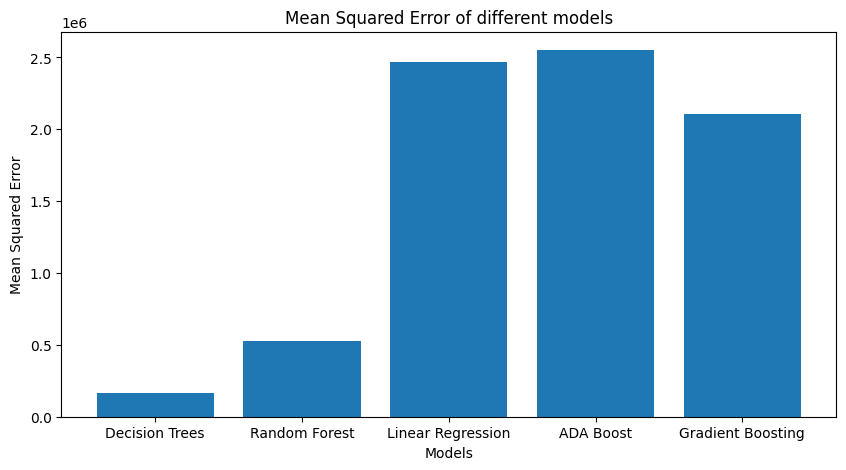


MAE of Decision Trees: 92.38434395814137
MAE of Random Forest: 497.87049760997564
MAE of Linear Regression: 1200.4080284637287
MAE of ADA Boost: 1248.0986165163586
MAE of Gradient Boosting: 1063.5967063300766



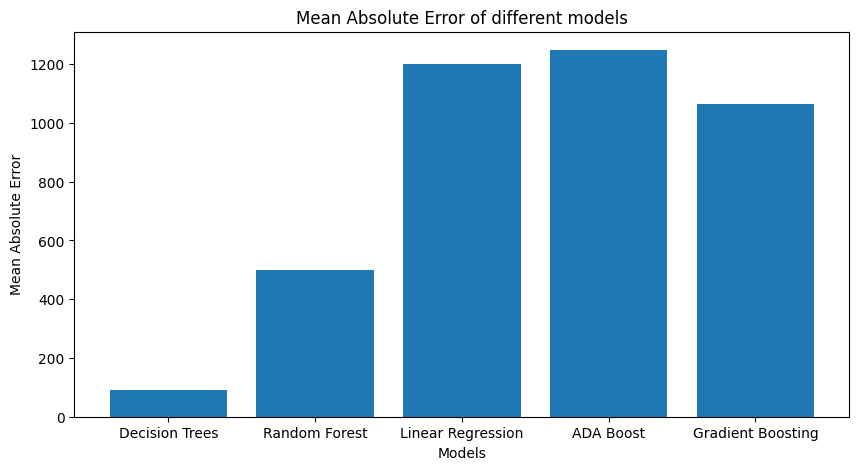

In [618]:
# Plotting RMSE of all models to compare them
RMSE = [np.sqrt(metrics.mean_squared_error(y_test, final_pred_DecisionTrees)), np.sqrt(metrics.mean_squared_error(y_test, final_pred_RandomForest)), np.sqrt(metrics.mean_squared_error(y_test, final_pred_LinearRegression)), np.sqrt(metrics.mean_squared_error(y_test, final_pred_ADABoost)), np.sqrt(metrics.mean_squared_error(y_test, final_pred_GradientBoosting))]
print(f"""
RMSE of Decision Trees: {np.sqrt(metrics.mean_squared_error(y_test, final_pred_DecisionTrees))}
RMSE of Random Forest: {np.sqrt(metrics.mean_squared_error(y_test, final_pred_RandomForest))}
RMSE of Linear Regression: {np.sqrt(metrics.mean_squared_error(y_test, final_pred_LinearRegression))}
RMSE of ADA Boost: {np.sqrt(metrics.mean_squared_error(y_test, final_pred_ADABoost))}
RMSE of Gradient Boosting: {np.sqrt(metrics.mean_squared_error(y_test, final_pred_GradientBoosting))}
""")
models = ['Decision Trees', 'Random Forest', 'Linear Regression','ADA Boost', 'Gradient Boosting']
plt.figure(figsize=(10, 5))
plt.title('Root Mean Squared Error of different models')
plt.bar(models, RMSE)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.show()
# Plotting MSE of all models to compare them
MSE = [metrics.mean_squared_error(y_test, final_pred_DecisionTrees), metrics.mean_squared_error(y_test, final_pred_RandomForest), metrics.mean_squared_error(y_test, final_pred_LinearRegression), metrics.mean_squared_error(y_test, final_pred_ADABoost), metrics.mean_squared_error(y_test, final_pred_GradientBoosting)]
print(f"""
MSE of Decision Trees: {metrics.mean_squared_error(y_test, final_pred_DecisionTrees)}
MSE of Random Forest: {metrics.mean_squared_error(y_test, final_pred_RandomForest)}
MSE of Linear Regression: {metrics.mean_squared_error(y_test, final_pred_LinearRegression)}
MSE of ADA Boost: {metrics.mean_squared_error(y_test, final_pred_ADABoost)}
MSE of Gradient Boosting: {metrics.mean_squared_error(y_test, final_pred_GradientBoosting)}
""")
models = ['Decision Trees', 'Random Forest', 'Linear Regression','ADA Boost', 'Gradient Boosting']
plt.figure(figsize=(10, 5))
plt.title('Mean Squared Error of different models')
plt.bar(models, MSE)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Plotting MAE of all models to compare them
MAE = [metrics.mean_absolute_error(y_test, final_pred_DecisionTrees), metrics.mean_absolute_error(y_test, final_pred_RandomForest), metrics.mean_absolute_error(y_test, final_pred_LinearRegression), metrics.mean_absolute_error(y_test, final_pred_ADABoost), metrics.mean_absolute_error(y_test, final_pred_GradientBoosting)]
print(f"""
MAE of Decision Trees: {metrics.mean_absolute_error(y_test, final_pred_DecisionTrees)}
MAE of Random Forest: {metrics.mean_absolute_error(y_test, final_pred_RandomForest)}
MAE of Linear Regression: {metrics.mean_absolute_error(y_test, final_pred_LinearRegression)}
MAE of ADA Boost: {metrics.mean_absolute_error(y_test, final_pred_ADABoost)}
MAE of Gradient Boosting: {metrics.mean_absolute_error(y_test, final_pred_GradientBoosting)}
""")
models = ['Decision Trees', 'Random Forest', 'Linear Regression','ADA Boost', 'Gradient Boosting']
plt.figure(figsize=(10, 5))
plt.title('Mean Absolute Error of different models')
plt.bar(models, MAE)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.show()